In [2]:
import os
import numpy as np
from osgeo import gdal
import cv2
import matplotlib.pyplot as plt

def save_tiff_as_numpy(tiff_file, output_dir, verified_mat):
    # Create saving directory
    if os.path.exists(output_dir)==False:
        os.makedirs(output_dir, exist_ok=True)

    # Open the TIFF file
    dataset = gdal.Open(tiff_file)

    # Loop over all bands in the TIFF file
    for i in range(dataset.RasterCount):
        # Read the band data as a NumPy array
        band = dataset.GetRasterBand(i+1)
        data = band.ReadAsArray()
#         print(np.count_nonzero(verified_mat==1))
        data = data[verified_mat==1]
        index = np.where(verified_mat == 1)
        print(index)
        for j,val in enumerate(data):
            # Construct the output file name
#             output_file = os.path.join(output_dir, f"{index[0][j]}_{index[1][j]}.npy")
            output_file = os.path.join(output_dir, f"{j}.npy")
            print(output_file)

            # Save the data as a NumPy file
            np.save(output_file, val)

    # Close the dataset
    dataset = None


In [5]:
input_dir = 'D:\\1GRADUATED\\paper\\downscaling_data\\Soil_moisture_downscale_czt\\ATI\\'
# output_dir = 'E:\\downscaling\\Soil_moisture_downscale_czt\\DATASET\\INPUT\\ATI\\'

In [6]:
for j in range(260):
    test_dir = input_dir + 'ATI2015{:03d}.tif'.format(j+91)

    # Open the TIFF file
    dataset = gdal.Open(test_dir)
    for i in range(dataset.RasterCount):
            # Read the band data as a NumPy array
            band = dataset.GetRasterBand(i+1)
            data = band.ReadAsArray()
            if(data[data>0].shape[0]>7000):
                print(test_dir)
                print(data[data>0].shape)

D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\ATI\ATI2015187.tif
(7292,)
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\ATI\ATI2015223.tif
(7066,)
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\ATI\ATI2015282.tif
(7210,)
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\ATI\ATI2015287.tif
(7241,)
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\ATI\ATI2015288.tif
(7289,)
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\ATI\ATI2015292.tif
(7288,)
D:\1GRADUATED\paper\downscaling_data\Soil_moisture_downscale_czt\ATI\ATI2015340.tif
(7034,)


[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


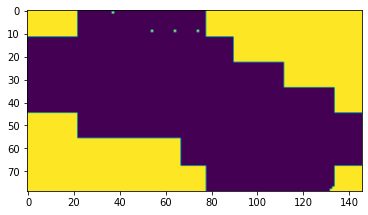

In [17]:
test_dir = input_dir + 'ATI2015288.tif'

# Open the TIFF file
dataset = gdal.Open(test_dir)
for i in range(dataset.RasterCount):
    # Read the band data as a NumPy array
    band = dataset.GetRasterBand(i+1)
    data = band.ReadAsArray()
    
    # 获取无数据值
    nodata_value = band.GetNoDataValue()

    # 将缺失值设置为NaN
    data[data == nodata_value] = np.nan# 获取无数据值

#     print(data.shape[0]*data.shape[1])
#     print(7*13*81)
    print(data)
    print(np.isnan(data))
    plt.imshow(np.isnan(data))
    plt.show()